<a href="https://colab.research.google.com/github/Faz12345/prodigy_inotech_task3.ipynb/blob/main/prodigy_infotech_task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from numpy import *
from pandas import *
from seaborn import *

In [3]:
data = read_csv('Data 1.csv')
data.head(10)

,age,job,marital,education,Credit,balance,housing_loan,personal_loan,contact,last_contact_day,last_contact_month,last_contact_duration/sec,campaign,pdays,previous,previous marketing campaign,subscribed term deposit
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,October,79 seconds,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,May,220 seconds,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,April,185 seconds,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,June,199 seconds,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,May,226 seconds,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,February,141 seconds,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,May,341 seconds,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,May,151 seconds,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,May,57 seconds,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,April,313 seconds,1,147,2,failure,no


In [4]:
data.describe()

,age,balance,last_contact_day,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,50.000000,871.000000,25.000000


In [5]:
data.isnull().sum()

,0
age,0
job,0
marital,0
education,0
Credit,0
balance,0
housing_loan,0
personal_loan,0
contact,0
last_contact_day,0


In [7]:
data.duplicated().sum()

0

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   age                          4521 non-null   int64 
 1   job                          4521 non-null   object
 2   marital                      4521 non-null   object
 3   education                    4521 non-null   object
 4   Credit                       4521 non-null   object
 5   balance                      4521 non-null   int64 
 6   housing_loan                 4521 non-null   object
 7   personal_loan                4521 non-null   object
 8   contact                      4521 non-null   object
 9   last_contact_day             4521 non-null   int64 
 10  last_contact_month           4521 non-null   object
 11  last_contact_duration/sec    4521 non-null   object
 12  campaign                     4521 non-null   int64 
 13  pdays                        4521

In [9]:
data_frame = DataFrame(data)
data_frame['last_contact_duration/sec'] = data_frame['last_contact_duration/sec'].str.replace(' seconds', '').astype(float)

In [12]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
categorical_cols = [
    'job',
    'marital',
    'education',
    'Credit',
    'housing_loan',
    'personal_loan',
    'contact',
    'last_contact_month',
    'previous marketing campaign',
    'subscribed term deposit'
]

for col in categorical_cols:
    le = LabelEncoder()
    data_frame[col] = le.fit_transform(data_frame[col])
    label_encoders[col] = le
X = data_frame.drop('subscribed term deposit', axis=1)
y = data_frame['subscribed term deposit']

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
X = data_frame.drop('subscribed term deposit', axis=1)
y = data_frame['subscribed term deposit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [14]:
y_pred = classifier.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       807
           1       0.42      0.47      0.44        98

    accuracy                           0.87       905
   macro avg       0.68      0.70      0.68       905
weighted avg       0.88      0.87      0.88       905



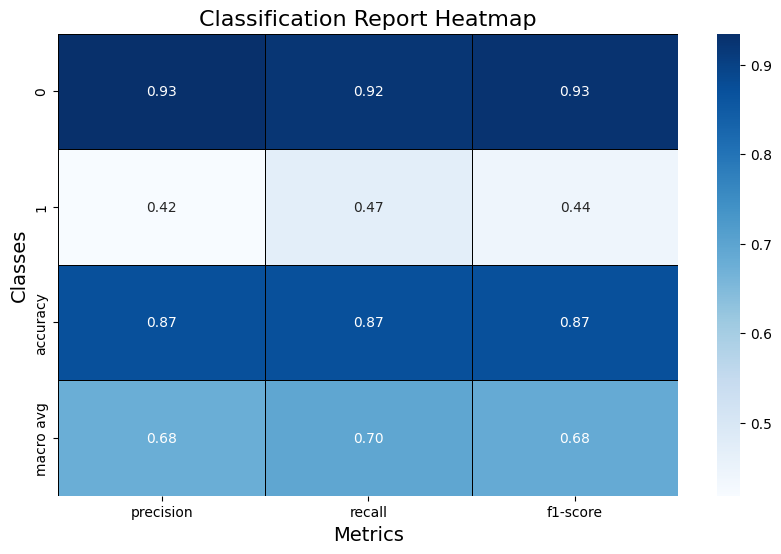

In [16]:
from matplotlib.pyplot import *
from seaborn import *
report_df = DataFrame(report).transpose()
figure(figsize=(10, 6))
heatmap(report_df.iloc[:-1, :-1], annot=True, fmt=".2f", cmap="Blues", cbar=True,  linewidths=0.5, linecolor='black')

title('Classification Report Heatmap', fontsize=16)
xlabel('Metrics', fontsize=14)
ylabel('Classes', fontsize=14)

savefig('classification_report_heatmap.png', dpi=300)
show()
close()